### Approximation of function


The last problem considered in this part is the task of function values approximation. It involves predicting a continuous value at the network output (not discrete values such as labels). An example of regression may be predicting the average value of rainfall in a given month or the auction price on the stock exchange. We will consider this problem using the example of a well-known housing price database in Boston. This database contains average housing prices in the 1970s, which depend on $13$ different parameters, such as the crime rate, real estate tax, nitrogen oxide concentration in the air, average distance to industrial centers, etc. As the input of the network, we provide a data vector containing the values of the mentioned parameters that are characteristic for a given area of the city, and as the output we expect the value of the average price of an apartment in a given area.

We can read data from the Boston Housing Dataset using the following code:

In [1]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In this dataset we have $404$ vectors in the training set and $102$ vectors in the test set. However, it should be noted that individual elements of the input vectors may have values in various ranges of variability. Below we show the minimum, average, maximum and standard deviation ("std") values relative to the training vectors.

In [2]:
# preparation of data
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
print('mean:',np.round(mean,3))
print(' std:',np.round(std,3))
mean=test_data.mean(axis=0)
test_data-=mean
std=test_data.std(axis=0)
test_data/=std
print('mean:',np.round(mean,3))
print(' std:',np.round(std,3))

mean: [3.74500e+00 1.14800e+01 1.11040e+01 6.20000e-02 5.57000e-01 6.26700e+00
 6.90110e+01 3.74000e+00 9.44100e+00 4.05899e+02 1.84760e+01 3.54783e+02
 1.27410e+01]
 std: [9.22900e+00 2.37380e+01 6.80300e+00 2.41000e-01 1.17000e-01 7.09000e-01
 2.79060e+01 2.02800e+00 8.68800e+00 1.66169e+02 2.19800e+00 9.39950e+01
 7.24600e+00]
mean: [3.09200e+00 1.09020e+01 1.12650e+01 9.80000e-02 5.44000e-01 6.35400e+00
 6.68490e+01 4.01200e+00 9.98000e+00 4.17500e+02 1.83750e+01 3.64163e+02
 1.23050e+01]
 std: [5.34700e+00 2.14670e+01 7.04900e+00 2.97000e-01 1.09000e-01 6.69000e-01
 2.88920e+01 2.36800e+00 8.72900e+00 1.76519e+02 2.01700e+00 7.87490e+01
 6.66200e+00]


In [3]:
np.save('train_data.npy',train_data)
np.save('train_targets.npy',train_targets)
np.save('test_data.npy',test_data)
np.save('test_targets.npy',test_targets)

After normalizing the data, we can proceed with creating a neural network training model. The process of creating and training a neural network model is accomplished using the following code:

In [4]:
import tensorflow as tf

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.build(input_shape=np.shape(test_data))
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

When compiling, we choose the Adam optimizer, the loss function as mean squared error ("mse"), and the accuracy metric as mean absolute error ("mae").

In [5]:
history=model.fit(train_data,train_targets,epochs=1000,verbose=True)
tf.keras.models.save_model(model,'model_approximation.h5')

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 597.3599 - mae: 22.5824
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 594.1010 - mae: 22.5243
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 590.9960 - mae: 22.4675
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 588.0090 - mae: 22.4112
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 584.9773 - mae: 22.3525
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 581.7213 - mae: 22.2889
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 578.4584 - mae: 22.2244
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 575.2404 - mae: 22.1593
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 572.0225 - mae: 22.0936
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 568.4222 - mae: 22.0224
Epoch 11/1000
13/13

13/13 [==============================] - 0s 1ms/step - loss: 119.4257 - mae: 8.4243
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 118.0303 - mae: 8.3558
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 116.7526 - mae: 8.2906
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 115.4237 - mae: 8.2303
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 114.1489 - mae: 8.1719
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 112.9583 - mae: 8.1121
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 111.7268 - mae: 8.0519
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 110.5099 - mae: 7.9921
Epoch 92/1000
13/13 [==============================] - 0s 1ms/step - loss: 109.2779 - mae: 7.9304
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 108.1130 - mae: 7.8752
Epoch 94/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 58.6364 - mae: 5.1206
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 57.4908 - mae: 5.0597
Epoch 169/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.3014 - mae: 5.0066
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 54.8973 - mae: 4.9424
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 53.5150 - mae: 4.8726
Epoch 172/1000
13/13 [==============================] - 0s 1ms/step - loss: 52.1007 - mae: 4.7973
Epoch 173/1000
13/13 [==============================] - 0s 1ms/step - loss: 50.5414 - mae: 4.7247
Epoch 174/1000
13/13 [==============================] - 0s 1ms/step - loss: 49.3323 - mae: 4.6567
Epoch 175/1000
13/13 [==============================] - 0s 1ms/step - loss: 48.0654 - mae: 4.5969
Epoch 176/1000
13/13 [==============================] - 0s 1ms/step - loss: 46.8594 - mae: 4.5330
Epoch 177/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 23.6385 - mae: 3.3837
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.5404 - mae: 3.3743
Epoch 252/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.4470 - mae: 3.3696
Epoch 253/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.3357 - mae: 3.3633
Epoch 254/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.2406 - mae: 3.3564
Epoch 255/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.1514 - mae: 3.3478
Epoch 256/1000
13/13 [==============================] - 0s 1ms/step - loss: 23.0619 - mae: 3.3383
Epoch 257/1000
13/13 [==============================] - 0s 1ms/step - loss: 22.9802 - mae: 3.3363
Epoch 258/1000
13/13 [==============================] - 0s 1ms/step - loss: 22.9040 - mae: 3.3298
Epoch 259/1000
13/13 [==============================] - 0s 1ms/step - loss: 22.8101 - mae: 3.3231
Epoch 260/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 19.1020 - mae: 3.1127
Epoch 334/1000
13/13 [==============================] - 0s 1ms/step - loss: 19.0696 - mae: 3.1078
Epoch 335/1000
13/13 [==============================] - 0s 1ms/step - loss: 19.0308 - mae: 3.1062
Epoch 336/1000
13/13 [==============================] - 0s 1ms/step - loss: 19.0139 - mae: 3.1047
Epoch 337/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.9791 - mae: 3.1040
Epoch 338/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.9505 - mae: 3.1028
Epoch 339/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.9115 - mae: 3.0971
Epoch 340/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.8736 - mae: 3.0955
Epoch 341/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.8493 - mae: 3.0966
Epoch 342/1000
13/13 [==============================] - 0s 1ms/step - loss: 18.8306 - mae: 3.0969
Epoch 343/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 16.8614 - mae: 2.9451
Epoch 417/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.8180 - mae: 2.9453
Epoch 418/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.8025 - mae: 2.9423
Epoch 419/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.7852 - mae: 2.9415
Epoch 420/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.7479 - mae: 2.9379
Epoch 421/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.7351 - mae: 2.9362
Epoch 422/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.6915 - mae: 2.9311
Epoch 423/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.6675 - mae: 2.9276
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 16.6427 - mae: 2.9256
Epoch 425/1000
13/13 [==============================] - 0s 1ms/step - loss: 16.6203 - mae: 2.9241
Epoch 426/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 14.5874 - mae: 2.7760
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.6073 - mae: 2.7739
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.5690 - mae: 2.7750
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.5410 - mae: 2.7733
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.5116 - mae: 2.7710
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.4927 - mae: 2.7685
Epoch 505/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.4772 - mae: 2.7688
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.4571 - mae: 2.7693
Epoch 507/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.4333 - mae: 2.7677
Epoch 508/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.4249 - mae: 2.7686
Epoch 509/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 13.1515 - mae: 2.6633
Epoch 583/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.1323 - mae: 2.6644
Epoch 584/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.1137 - mae: 2.6604
Epoch 585/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.1183 - mae: 2.6625
Epoch 586/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.0956 - mae: 2.6604
Epoch 587/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.1024 - mae: 2.6563
Epoch 588/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.0774 - mae: 2.6583
Epoch 589/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.0610 - mae: 2.6552
Epoch 590/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.0585 - mae: 2.6533
Epoch 591/1000
13/13 [==============================] - 0s 1ms/step - loss: 13.0594 - mae: 2.6494
Epoch 592/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 12.6350 - mae: 2.6216
Epoch 666/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6273 - mae: 2.6150
Epoch 667/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6126 - mae: 2.6132
Epoch 668/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6405 - mae: 2.6218
Epoch 669/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6053 - mae: 2.6147
Epoch 670/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6617 - mae: 2.6120
Epoch 671/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.5987 - mae: 2.6073
Epoch 672/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.5939 - mae: 2.6127
Epoch 673/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.6062 - mae: 2.6202
Epoch 674/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.5859 - mae: 2.6152
Epoch 675/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 12.3600 - mae: 2.5833
Epoch 749/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3589 - mae: 2.5834
Epoch 750/1000
13/13 [==============================] - 0s 2ms/step - loss: 12.3686 - mae: 2.5839
Epoch 751/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3573 - mae: 2.5831
Epoch 752/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3588 - mae: 2.5842
Epoch 753/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3464 - mae: 2.5816
Epoch 754/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3494 - mae: 2.5801
Epoch 755/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3478 - mae: 2.5809
Epoch 756/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3449 - mae: 2.5817
Epoch 757/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.3434 - mae: 2.5830
Epoch 758/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 12.1340 - mae: 2.5566
Epoch 832/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1320 - mae: 2.5541
Epoch 833/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1341 - mae: 2.5553
Epoch 834/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1275 - mae: 2.5541
Epoch 835/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1202 - mae: 2.5503
Epoch 836/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1239 - mae: 2.5506
Epoch 837/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1203 - mae: 2.5499
Epoch 838/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1238 - mae: 2.5508
Epoch 839/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1265 - mae: 2.5548
Epoch 840/1000
13/13 [==============================] - 0s 1ms/step - loss: 12.1050 - mae: 2.5513
Epoch 841/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 11.9462 - mae: 2.5322
Epoch 915/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9311 - mae: 2.5304
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9327 - mae: 2.5268
Epoch 917/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9387 - mae: 2.5303
Epoch 918/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9441 - mae: 2.5275
Epoch 919/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9428 - mae: 2.5275
Epoch 920/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9281 - mae: 2.5262
Epoch 921/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9404 - mae: 2.5276
Epoch 922/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9449 - mae: 2.5286
Epoch 923/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.9499 - mae: 2.5256
Epoch 924/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 11.8873 - mae: 2.5245
Epoch 998/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.8767 - mae: 2.5225
Epoch 999/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.8755 - mae: 2.5221
Epoch 1000/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.8829 - mae: 2.5234


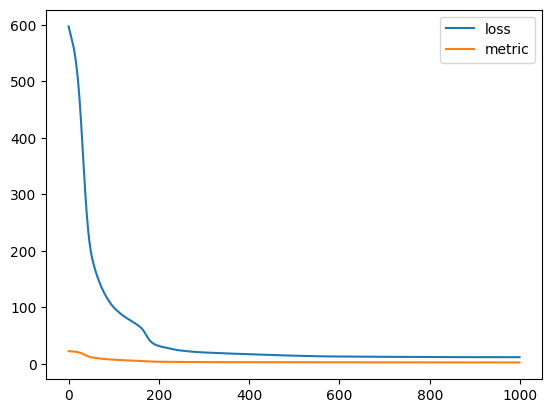

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.legend(['loss','metric'])
plt.show()

After training, such a model can be easily read from the file and used in practice to predict apartment prices. The following code snippet shows how we can predict prices based on a vector of input data:

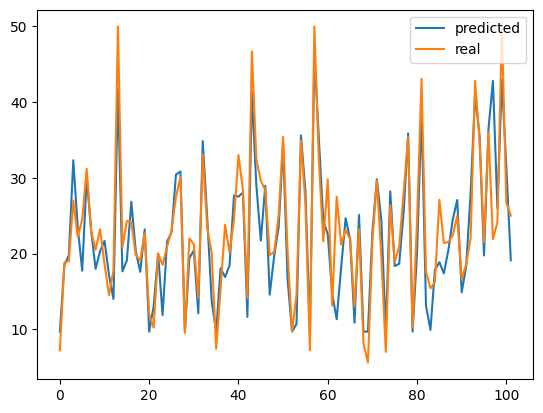

In [7]:
# prices prediction
model=tf.keras.models.load_model('model_approximation.h5')
z=model.predict(test_data,verbose=0)
plt.plot(z)
plt.plot(test_targets)
plt.legend(['predicted','real'])
plt.show()

---